<img src="ProjectTitle.png">

<img src="Company.png">

Galactic Instruments is an engineering company dedicated to enabling space travel. They make various products that can be used in advanced spaceships. Each Team is aligned on the products they serve. The products are:

1. Warp Engines
2. Transporters
3. Tricorders
4. Universal Translators
5. Tractor Beams
6. Photon Torpedos

There are also 3 different deparentments (Parent Organizations) that server different functions. The departments are:

1. Systems Engineering: Technical branch for the sales team. They work with customers to prove the equipement can meet the customers needs before purchase.
2. Support Engineering: Assist customers in troubleshooting and ensuring they are successful after the sale.
3. R&D: Research and Development is focused on creating new products, but sometimes get involved in special projects for certain customers.

Please note:

1. The data is from a real company, but the teams have been renamed to protect confidentiality. 
2. The data was pulled from a MySQL database.
3. Effort over Estimate is calculated by dividing the total hours spent on the project by the project estimate.

<img src="TheProblem.png" alt="Drawing" style="width: 200px" align="left">

How to make better project estimates faster? Sales managers approve technical resouces to work on projects based on their estimates. Over estimating, means the company is approving less projects, and under estimating means they are increasing the cost of doing business. Getting estimates right means teams can better manage bandwidth and have better return on investment.  

<img src="HowMuchOfProblem.png" alt="Drawing" style="width: 375px" align="left">

Lets do some analysis to determine the scale of the problem.

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
######### Bring in data ##########
data = pd.read_csv('Project Estimates Scrubbed.csv', index_col='Date')

#Turn Date, which is project assignment date, to the index
data.index = pd.to_datetime(data.index)
data['First_Estimate'] = pd.to_datetime(data['First_Estimate'])
data.sort_index(inplace=True)
data.head(5)

,First_Estimate,Days_between_estimate,EstimatedEffort,Total_Hours,Effort_over_Estimate,Parent_Team,Team_Name,Region
Date,,,,,,,,
2016-10-05,2016-10-11,6,20.0,12.5,62,Support Engineering,Tricorders,US & Canada
2016-10-05,2016-10-24,19,24.0,44.0,183,Systems Engineering,Warp Engines,US & Canada
2016-10-05,2016-11-28,54,60.0,57.5,95,Support Engineering,Warp Engines,US & Canada
2016-10-05,2016-10-11,6,7.0,5.0,71,Support Engineering,Transporters,US & Canada
2016-10-06,2016-10-19,13,24.0,2.0,8,Support Engineering,Warp Engines,US & Canada


In [4]:
###### Create Bucket Functions ########
#Group the projects by how many days it took to make estimate
def days_bucket(days):
    output = ""
    if days == 0:
        output = "a. 0"
    elif days == 1:
        output = "b. 1"
    elif days == 2:
        output = "c. 2"
    elif days == 3:
        output = "d. 3"
    elif days == 4:
        output = "e. 4"
    elif days == 5:
        output = "f. 5"
    elif days == 6:
        output = "g. 6"
    elif days == 7:
        output = "h. 7"
    elif days > 7 and days <=20:
        output = "i. 7 - 20"
    elif days > 20 and days <=40:
        output = "j. 20 - 40"
    else:
        output = "k. > 40"
    
    return output

#Group projects by Effort over estimate percentage.
def estimate_effort_bucket(ee):
    output = ''
    if ee < 80:
        output = "a. < 80"
    elif (ee >= 80 and ee < 120):
        output = "b. 80 - 120"
    elif (ee >= 120 and ee < 200):
        output = "c. 120 - 200"
    else:
        output = "d. > 200"
    
    return output

#Group prjects by estimated project size
def effort_bucket(effort):
    output = ''
    if effort <= 8:
        output = "a. < 8"
    elif (effort > 8 and effort < 20):
        output = "b. 8 - 20"
    elif (effort >= 20 and effort < 40):
        output = "c. 20 - 40"
    elif (effort >= 40 and effort < 80):
        output = "d. 40 - 80"
    else:
        output = "e. > 80"
    
    return output

In [5]:
######## Apply Bucket function and create new columns ###########
data['Days Bucket'] = data['Days_between_estimate'].apply(lambda x: days_bucket(x))
data['Estimate Effort Bucket'] = data['Effort_over_Estimate'].apply(lambda x: estimate_effort_bucket(x))
data['Effort Bucket'] = data['EstimatedEffort'].apply(lambda x: effort_bucket(x))

## Analysis

This analysis will do several things:

1. Show how each team is doing (number of projects, estimating, etc)
2. Help narrow down where to perform the treatment. (Where the treatment will be most effective)

#### Project Count
These graphs shows the raw number of projects each Parent Organization, Team and Region has gotten since 10/6/2016.

Questions Visualization Answer:

1. How many projects has each Parent/Team/Region gotten?

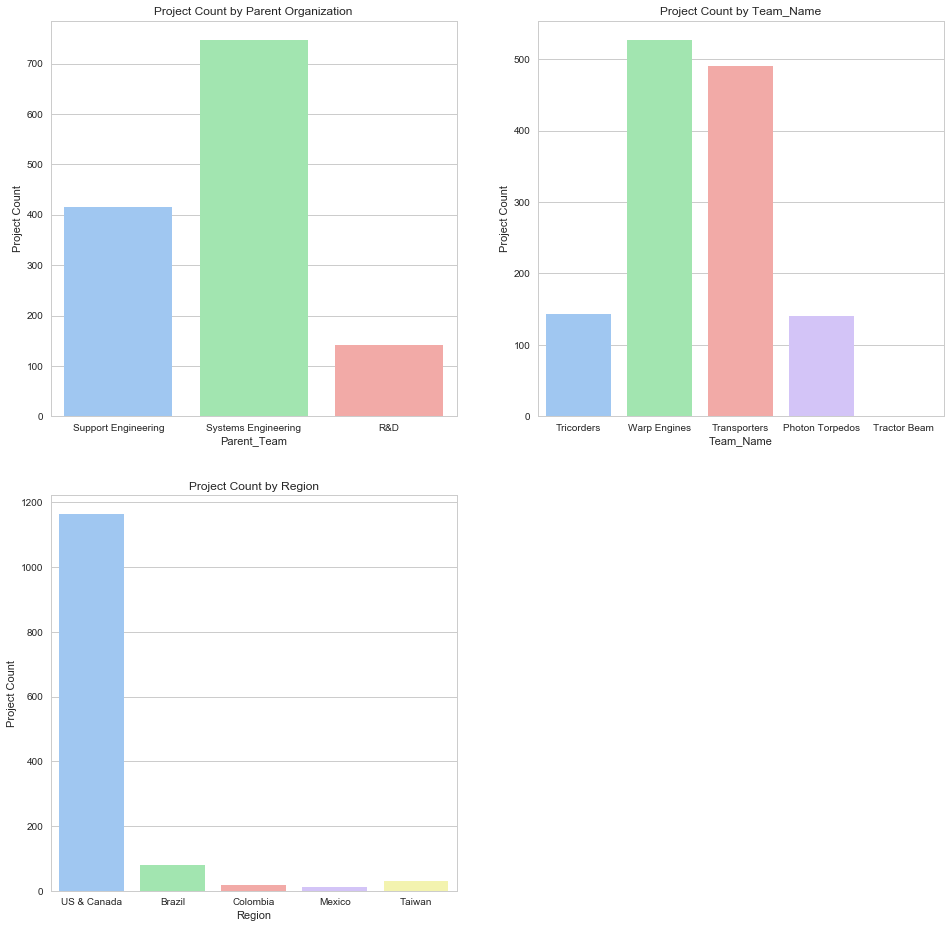

In [36]:
###### Plot showing the project count by different categories #########
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
#Parent Organization
sns.countplot(x="Parent_Team",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Parent Organization')
plt.subplot(2, 2, 2)

#Team
sns.countplot(x="Team_Name",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Team_Name')
plt.subplot(2, 2, 3)

#Region
sns.countplot(x="Region",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Region')

#### Effort over Estimate Spread
These plots show the median and variance (spread) of the Calculated effort over estimate for each Parent Orgranization, Team, and Region. 

Effort over estimate is a calculation to show how effecienct the execution of the project was based on the approved estimate.

Questions Visualizations Answer:

1. What is the overall mean/spread of Estimate over Effort?
2. How do each parent/team/region compare to each other?
3. What is the median for each parent/team/region?
4. How much variation is the Effort/Estimate for each parent/Team/Region?

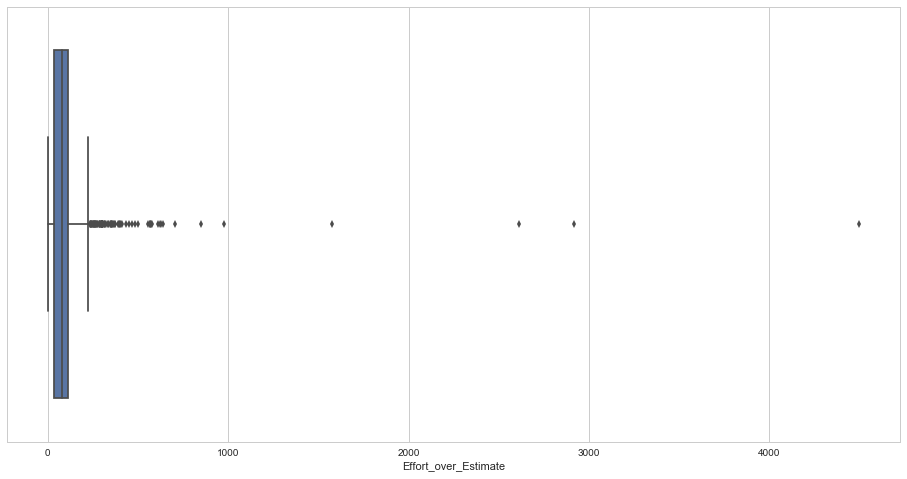

In [99]:
######### Box plot ############
plt.figure(figsize=(16,8))
sns.boxplot(data['Effort_over_Estimate'])

The box plot shows the distribution in different quartiles as well as the outliers. Note, we can remove the outliers, but kept them in because they are an important part of the story.

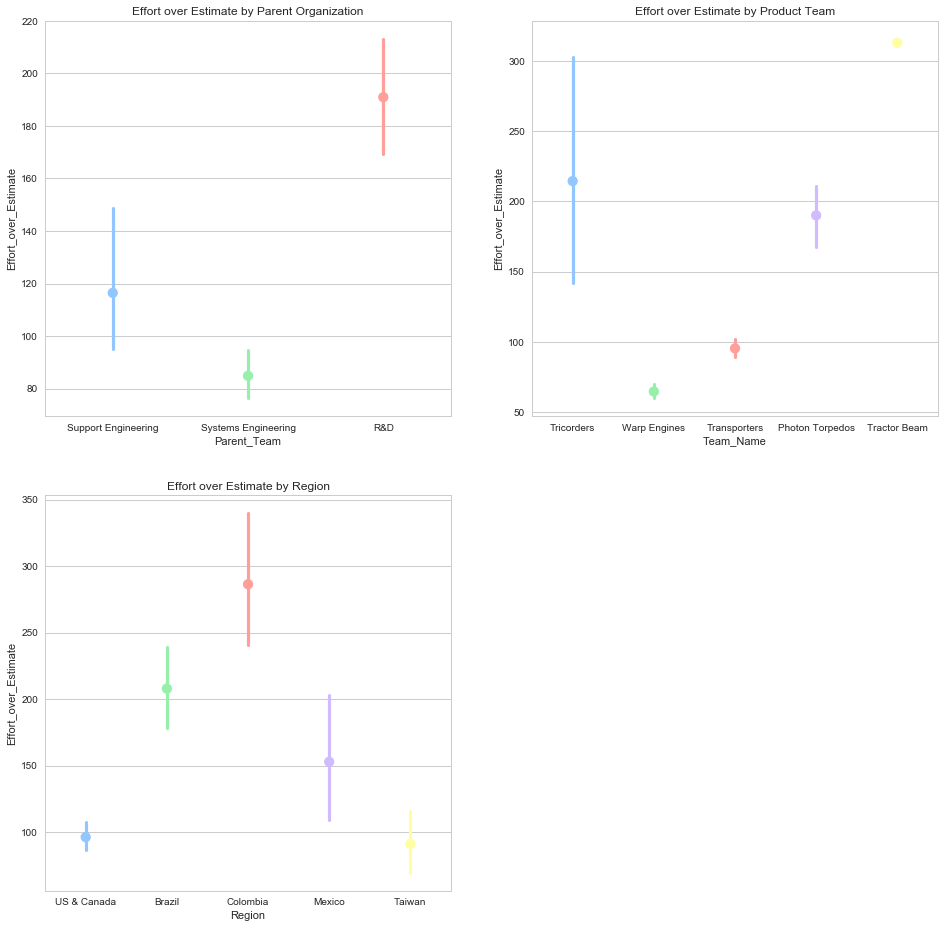

In [37]:
####### Point plot ###########
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
sns.pointplot(x="Parent_Team", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Parent Organization')
plt.subplot(2, 2, 2)
sns.pointplot(x="Team_Name", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Product Team')
plt.subplot(2,2,3)
sns.pointplot(x="Region", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Region')


The point plots represents an estimate of central tendency and comparison between the different groups. Even though, R&D, Colombia Region, and Tricorders are the worst offenders, they have relatively small number of projects.

#### Time Series Analysis

Questions the visualizations answer:

1. Is there a trend or seasonality to the Effort over Estimate?
2. What is the trend?

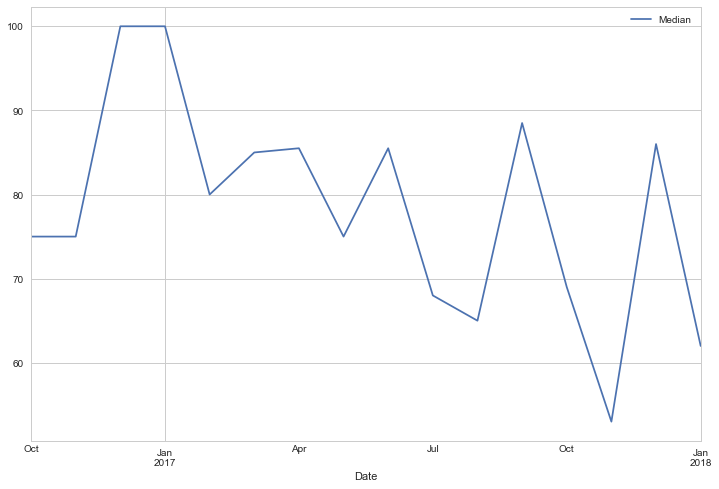

In [114]:
#Want to do timeseries. Is the trend getting worse?
data_week_df = data.groupby(pd.TimeGrouper("M")).median()['Effort_over_Estimate'].to_frame()
data_week_df.columns = ['Median']
#data_week_df.dropna(inplace=True)
data_week_df.plot(figsize=(12,8))

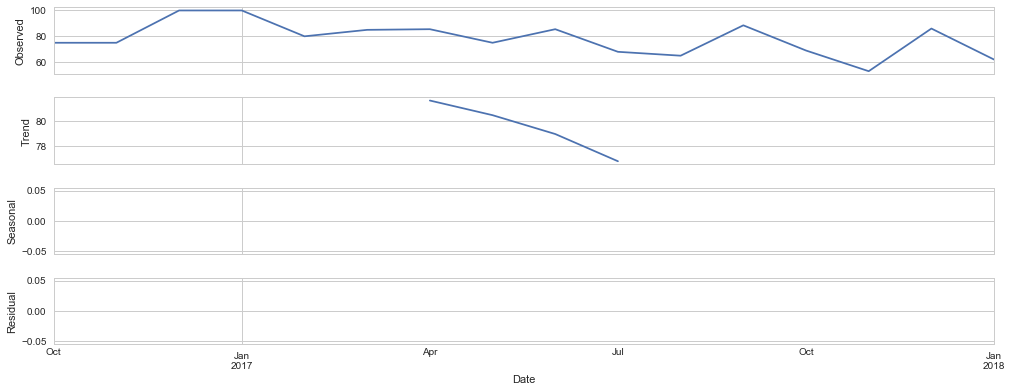

In [115]:
#Use Seasonal Decompose from Stats models to see if there are any trends in the data.

#data_week_df
result = seasonal_decompose(data_week_df['Median'])
fig = result.plot()
fig.set_size_inches(16,6)

Note, there is no seasonality to the data, and a very small trend.

### Effort Over Estimate vs. Days

Lets see how effective are the teams at making estimates X days from project assignment.

Questions Visualization Answer:

1. Does number of days it takes to make an estimate affect the accuracy?
2. How many projects are in each Estimate Over Effort bucket grouped by how many days it took to make estimate?
3. What percentage of projects are in each estimate over effort bucket grouped by days?
4. What is the current optimal length of time (in days) it takes to see the highest number of "right" estimations?

In [8]:
#Create Dataframe
day_bucket = data.groupby(['Days Bucket', 'Estimate Effort Bucket']).count()['First_Estimate'].to_frame()
day_bucket.columns=['Count']

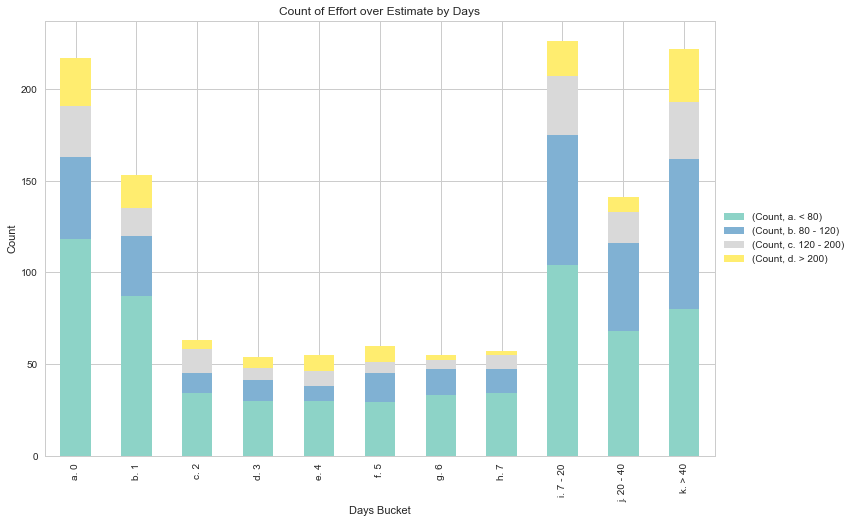

In [79]:
#Plot the count by day bucket
day_bucket.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title('Count of Effort over Estimate by Days')

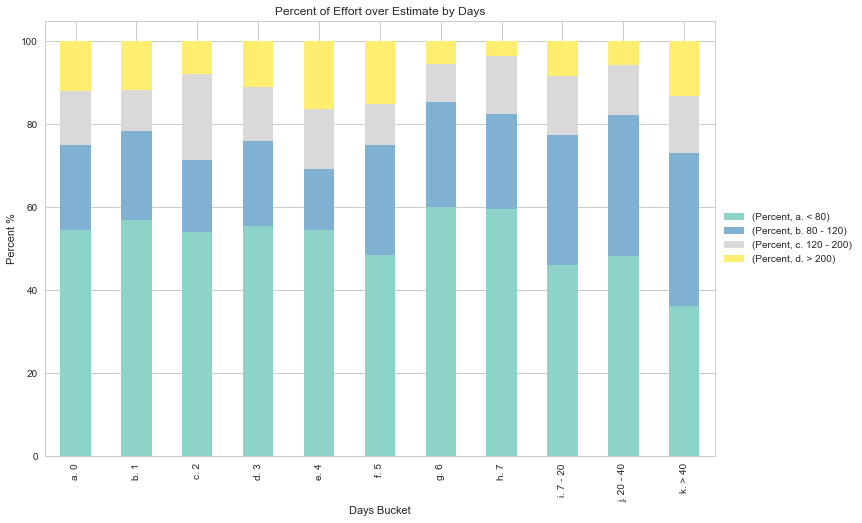

In [94]:
#Normalize by taking the percentage
day_bucket_normalize = day_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
day_bucket_normalize.columns=['Percent']
#Do unstack to handle multiindex data
day_bucket_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Effort over Estimate by Days')


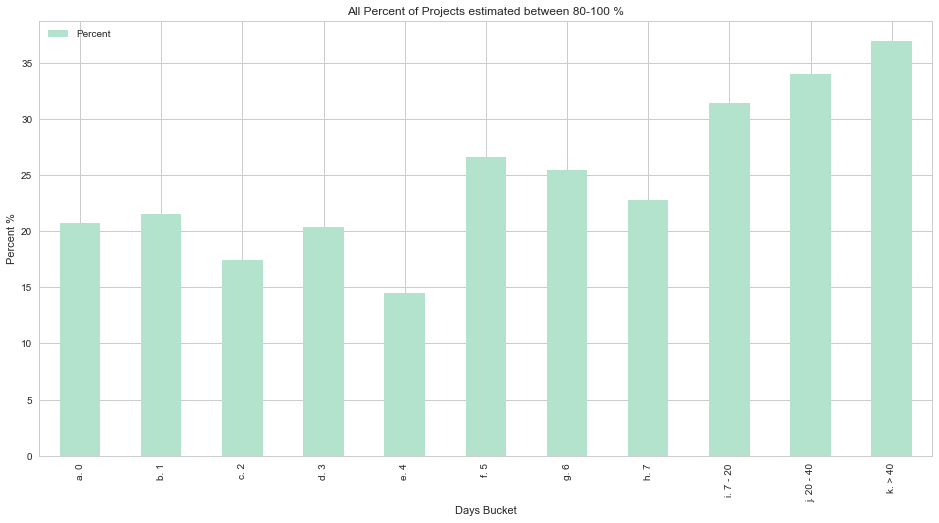

In [68]:
#Pull out just the 80-120 Percent
day_bucket_normalize.xs('b. 80 - 120', level='Estimate Effort Bucket').plot(kind='bar', figsize=(16,8), cmap='Pastel2')
plt.ylabel("Percent %")
plt.title('All Percent of Projects estimated between 80-100 %')

Currently all departments have a SLA (Service Level Agreement) to give project estimates within 7 days. Within that time period, day 5 seems to be correlated with giving the most accurate estimates (26%). However, the most accurate bucket was the greater than 40 days, which is unacepptable.

### Effort over estimate vs. Effort

Lets see how teams are at making estimates based on the size of the project.

Questions Visualizatoin Answers:

1. Does the estimated size of the project affect quality of estimates?
2. What is the breakdown of effort over estimate by project estimate bucket?
3. What percent of each estimated project size bucket do the teams get "right"?

In [6]:
#Create dataframe
estimate_effort = data.groupby(['Effort Bucket', 'Estimate Effort Bucket']).count()['First_Estimate'].to_frame()
estimate_effort.columns=['Count']

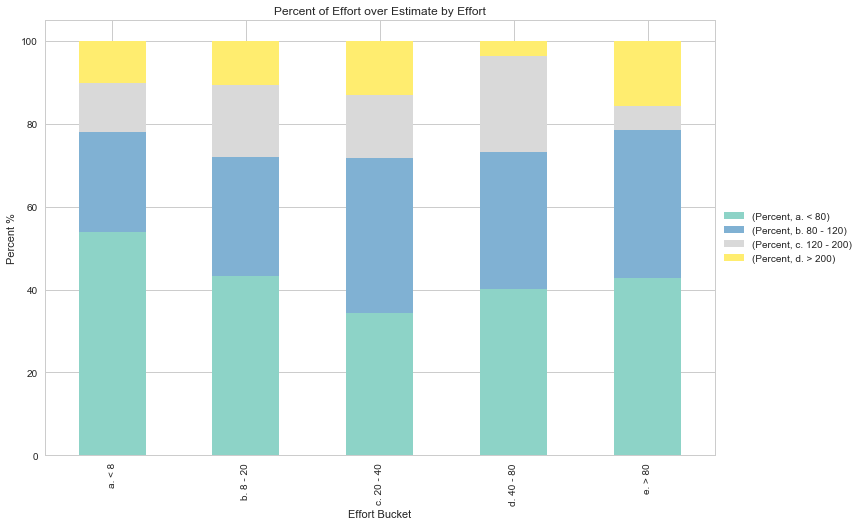

In [7]:
#Normalize the Data
estimate_effort_normalize = estimate_effort.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
estimate_effort_normalize.columns=['Percent']
estimate_effort_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Effort over Estimate by Effort')

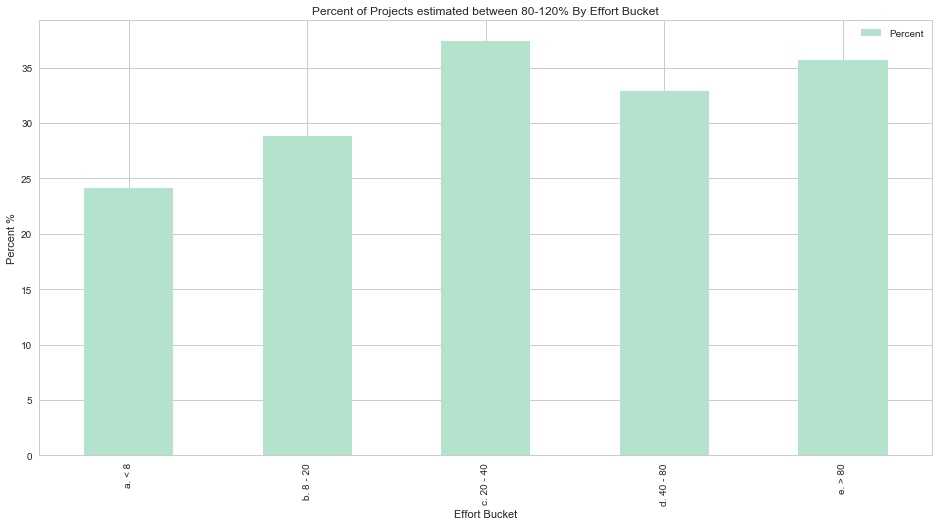

In [8]:
#Based on the estimated size of the project, what is percentage of projects we get "right"?
estimate_effort_normalize.xs('b. 80 - 120', level='Estimate Effort Bucket').plot(kind='bar', figsize=(16,8), cmap='Pastel2')
plt.ylabel("Percent %")
plt.title('Percent of Projects estimated between 80-120% By Effort Bucket')

The analysis shows the teams estimate projects that take between 20 and 40 hours the best at 37%. However, projects that are under 8 hours suffer the most from over estimation.

### Estimate over Effort vs Effort by Teams

Questions Visualizations Answer:

1. What is the breakdown of under estimates by parentnt organizations for each estimated project size?
2. What is the breakdown of under estimates by teams for each estimated project size?
3. What is the breakdown of over estimates by parennt organizations for each estimated project size?
4. What is the breakdown of over estimates by teams for each estimated project size?

#### Under Estimate

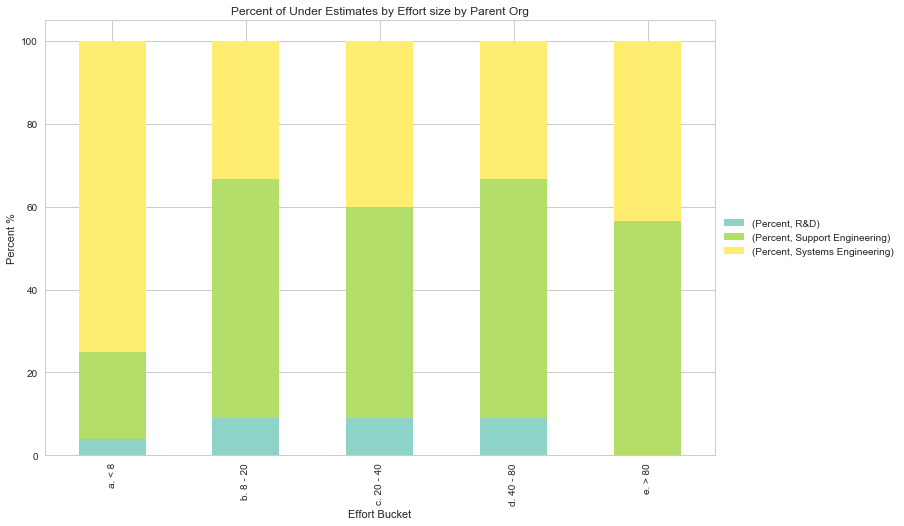

In [84]:
######## Parent Organization #######

#First need to filter out just the under estimateed projects
under_estimate_parent_bucket = data[data['Effort_over_Estimate'] < 80].groupby(['Effort Bucket', 'Parent_Team']).count()['First_Estimate'].to_frame()
under_estimate_parent_bucket.columns=['Count']
#Now need to normalize it
under_estimate_parent_bucket_normalize = under_estimate_parent_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
under_estimate_parent_bucket_normalize.columns=['Percent']
#Plot
under_estimate_parent_bucket_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Under Estimates by Effort size by Parent Org')

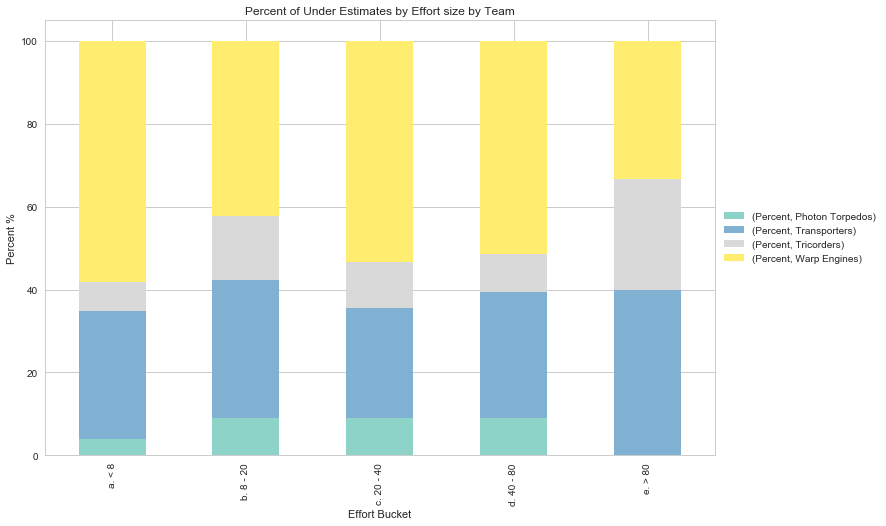

In [83]:
####### Team #########

#First need to filter out just the under estimateed projects
under_estimate_parent_bucket = data[data['Effort_over_Estimate'] < 80].groupby(['Effort Bucket', 'Team_Name']).count()['First_Estimate'].to_frame()
under_estimate_parent_bucket.columns=['Count']
#Now need to normalize it
under_estimate_parent_bucket_normalize = under_estimate_parent_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
under_estimate_parent_bucket_normalize.columns=['Percent']
#Plot
under_estimate_parent_bucket_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Under Estimates by Effort size by Team')

#### Over Estimate

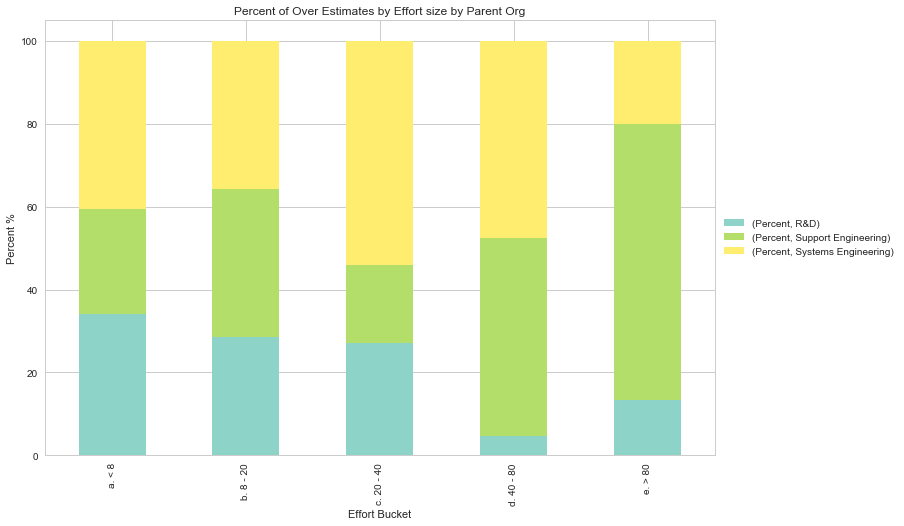

In [85]:
####### Parent Organization #########

#First need to filter out just the under estimateed projects
under_estimate_parent_bucket = data[data['Effort_over_Estimate'] > 120].groupby(['Effort Bucket', 'Parent_Team']).count()['First_Estimate'].to_frame()
under_estimate_parent_bucket.columns=['Count']
#Now need to normalize it
under_estimate_parent_bucket_normalize = under_estimate_parent_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
under_estimate_parent_bucket_normalize.columns=['Percent']
#Plot
under_estimate_parent_bucket_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Over Estimates by Effort size by Parent Org')

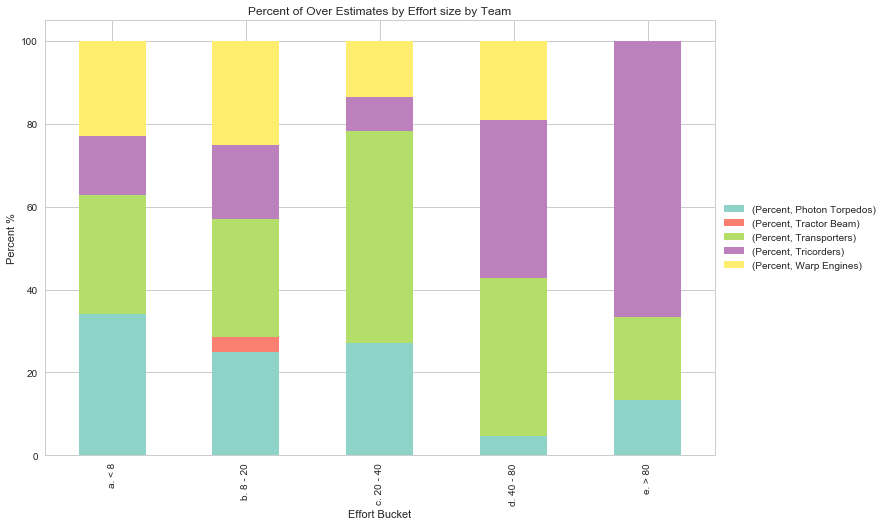

In [86]:
###### Team #######

#First need to filter out just the under estimateed projects
under_estimate_parent_bucket = data[data['Effort_over_Estimate'] > 120].groupby(['Effort Bucket', 'Team_Name']).count()['First_Estimate'].to_frame()
under_estimate_parent_bucket.columns=['Count']
#Now need to normalize it
under_estimate_parent_bucket_normalize = under_estimate_parent_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
under_estimate_parent_bucket_normalize.columns=['Percent']
#Plot
under_estimate_parent_bucket_normalize.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent %")
plt.title('Percent of Over Estimates by Effort size by Team')

<img src="Hypothesis.png" alt="Drawing" style="width: 175px" align="left">

Creating and deploying estimate training will improve estimates. The training should address 2 issues:

1. How to make accurate estimates?
2. How to make them relatively quickly?

<img src="TestingHypothesis.png" alt="Drawing" style="width: 275px" align="left">

Project estimate training should be created and given to several teams. The effort over estimate needs to be monitored after the training for a period of two months between groups that had the training and didnt have the training. Team Transporters and Warp Engines (in both the Systems and Support Engineer Organizations in the US) should receive the training and the other teams will not.

Please note, that all data will be tracked and pulled from the project/time tracking system.

If the "right" range (80-120%) of effort over estimate increases by 50% for the teams under test then the training would be considered successful. Furthermore, Over Estimates in the projects under 8 hours should be reduced by 30%. To validate the improvements are statistically significant, I will calculate a t-test at a alpha value of 0.05.

We should also monitor the days breakdown to see if the team is not only making better estimates, but making them within the 7 day SLA. The training should improve the time it takes to make an effective estimate within 7 days. We should also monitor the weekly median effort over estimate over time and see more of a downward trend.